In [232]:
# custom scripts
import assets.script as scr

# common packages
import numpy as np
import pandas as pd
import datetime as dt
import re
import requests as req

# utility packages
from pathlib import Path
from calendar import Calendar

# pipeline packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.neighbors import LocalOutlierFactor
# ML packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

# metrics packages
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# tuning packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [233]:
scr.sql_read_tables()

0             flights
1        flights_test
2    fuel_comsumption
3         pass_sample
4          passengers
5              sample
6           temptable
7          test_table
dtype: object

# TABLES

## Table `flights`

In [234]:
table_name = 'flights'
limit = 1000000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'

df_flights = pd.read_csv(Path('./data') / filename)

In [235]:
print(df_flights.columns.tolist())
print(df_flights.shape)

['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name']
(1000000, 42)


## Table `passengers`

In [236]:
table_name = 'passengers'
limit = 1000000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'

df_passengers = pd.read_csv(Path('./data') / filename)

In [237]:
print(df_passengers.columns.tolist())
print(df_passengers.shape)

['departures_scheduled', 'departures_performed', 'payload', 'seats', 'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time', 'unique_carrier', 'airline_id', 'unique_carrier_name', 'region', 'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new', 'origin_airport_id', 'origin_city_market_id', 'origin', 'origin_city_name', 'origin_country', 'origin_country_name', 'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name', 'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type', 'aircraft_config', 'year', 'month', 'distance_group', 'class', 'data_source']
(1000000, 38)


## Table `pass_sample` (`passengers` samples)

In [238]:
table_name = 'pass_sample'
limit = 1000000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'

df_pass_sample = pd.read_csv(Path('./data') / filename)

In [239]:
print(df_pass_sample.columns.tolist())
print(df_pass_sample.shape)
print(df_passengers.shape)

['departures_scheduled', 'departures_performed', 'payload', 'seats', 'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time', 'unique_carrier', 'airline_id', 'unique_carrier_name', 'region', 'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new', 'origin_airport_id', 'origin_city_market_id', 'origin', 'origin_city_name', 'origin_country', 'origin_country_name', 'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name', 'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type', 'aircraft_config', 'year', 'month', 'distance_group', 'class', 'data_source']
(156448, 38)
(1000000, 38)


## Table `fuel_comsumption`

In [240]:
table_name = 'fuel_comsumption'
limit = 1000000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'

df_fuel_comsumption = pd.read_csv(Path('./data') / filename)

In [241]:
print(df_fuel_comsumption.columns.tolist())
print(df_fuel_comsumption.shape)

['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name', 'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons', 'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons', 'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost', 'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost', 'total_cost', 'year']
(3035, 25)


## Table `flights_test` (`flights` sample for prediction - January 2022)

In [242]:
table_name = 'flights_test'
limit = 1000000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'

df_flights_test = pd.read_csv(Path('./data') / filename)

In [243]:
print(df_flights_test.columns.tolist())
print(df_flights_test.shape)
print(df_flights.shape)
df_flights_test.tail(10)

['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance']
(660556, 20)
(1000000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
660546,2020-01-31,DL,DL_CODESHARE,DL,4950,9E,N228PQ,4950,10397,ATL,"Atlanta, GA",15323,TRI,"Bristol/Johnson City/Kingsport, TN",2225,2331,N,66,1,227
660547,2020-01-31,DL,DL_CODESHARE,DL,4952,9E,N600LR,4952,12953,LGA,"New York, NY",13342,MKE,"Milwaukee, WI",1735,1921,N,166,1,738
660548,2020-01-31,DL,DL_CODESHARE,DL,4953,9E,N655CA,4953,12953,LGA,"New York, NY",14524,RIC,"Richmond, VA",1642,1825,N,103,1,292
660549,2020-01-31,DL,DL_CODESHARE,DL,4953,9E,N655CA,4953,14524,RIC,"Richmond, VA",12953,LGA,"New York, NY",1900,2033,N,93,1,292
660550,2020-01-31,DL,DL_CODESHARE,DL,4954,9E,N926XJ,4954,11193,CVG,"Cincinnati, OH",11278,DCA,"Washington, DC",1655,1824,N,89,1,411
660551,2020-01-31,DL,DL_CODESHARE,DL,4954,9E,N926XJ,4954,11278,DCA,"Washington, DC",11193,CVG,"Cincinnati, OH",1859,2041,N,102,1,411
660552,2020-01-31,DL,DL_CODESHARE,DL,4955,9E,N309PQ,4955,11278,DCA,"Washington, DC",11193,CVG,"Cincinnati, OH",1515,1702,N,107,1,411
660553,2020-01-31,DL,DL_CODESHARE,DL,4956,9E,N324PQ,4956,12478,JFK,"New York, NY",10785,BTV,"Burlington, VT",2205,2337,N,92,1,266
660554,2020-01-31,DL,DL_CODESHARE,DL,4957,9E,N132EV,4957,13930,ORD,"Chicago, IL",12478,JFK,"New York, NY",1035,1356,N,141,1,740
660555,2020-01-31,DL,DL_CODESHARE,DL,4958,9E,N390CA,4958,12953,LGA,"New York, NY",11057,CLT,"Charlotte, NC",2005,2222,N,137,1,544


## Table `sample` (`flights` samples)

In [244]:
table_name = 'sample'
limit = 1000000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'

df_sample = pd.read_csv(Path('./data') / filename)

/var/folders/xm/yv4_9lnx4vxb435678j65d140000gn/T/ipykernel_80171/2978874520.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample = pd.read_csv(Path('./data') / filename)


In [245]:
print(df_sample.columns.tolist())
print(df_sample.shape)
print(df_flights.shape)

['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name']
(1000000, 42)
(1000000, 42)


## Table `temptable` (`flights` but different samples)

In [246]:
table_name = 'temptable'
limit = 1000000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'

df_temptable = pd.read_csv(Path('./data') / filename)

/var/folders/xm/yv4_9lnx4vxb435678j65d140000gn/T/ipykernel_80171/1445488352.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temptable = pd.read_csv(Path('./data') / filename)


In [247]:
print(df_temptable.columns.tolist())
print(df_temptable.shape)
print(df_flights.shape)
df_temptable.head(10)

['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name']
(785850, 42)
(1000000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-19,AA,AA,AA,885,AA,N961UW,885,10397,ATL,...,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-19,AA,AA,AA,890,AA,N317PG,890,10397,ATL,...,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-19,AA,AA,AA,1309,AA,N956AN,1309,10397,ATL,...,731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-19,AA,AA,AA,1365,AA,N828AW,1365,10397,ATL,...,731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-19,AA,AA,AA,1409,AA,N979NN,1409,10397,ATL,...,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-12-19,DL,DL_CODESHARE,DL,5435,9E,N922XJ,5435,10397,ATL,...,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-12-19,DL,DL_CODESHARE,DL,5452,9E,N914XJ,5452,10397,ATL,...,765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-12-19,DL,DL_CODESHARE,DL,5502,9E,N368CA,5502,10397,ATL,...,694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-12-19,DL,DL_CODESHARE,DL,5514,9E,N295PQ,5514,10397,ATL,...,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-12-19,DL,DL_CODESHARE,DL,5015,9E,N331PQ,5015,10397,ATL,...,152.0,15.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Table `weather`

In [248]:
df_weather = pd.read_csv(Path('./data') / 'weather_locations.csv')

# Categorize weather conditions be code:
#   rain or like weather = > 263
#   sunny = 113
#   cloudy = 116, 119, 122
#   snow = 227, 230

df_wconditions = pd.read_csv(Path('./data') / 'weather_conditions.csv', usecols=[0,1,2], sep=',')
df_wconditions.drop_duplicates(inplace=True)
df_wconditions.sort_values(by='overhead_code', inplace=True)

In [249]:
daytime = []
df_weather_copy = df_weather.copy()

# add 6 hours to make it easier to separate into day/night
df_weather_copy['time'] = [time+600 for time in df_weather['time'].astype(int)]
df_weather_copy['tempC'] = [temp for temp in df_weather['tempC'].astype(int)]
df_weather_copy['condition'] = [con for con in df_weather['condition'].astype(int)]

# encode time into day/night
for i,time in df_weather_copy['time'].iteritems():
    # code the time to 24 hours
    if time >= 2400:
        df_weather_copy.loc[i, 'time'] = time - 2400
    # convert 
    if df_weather_copy.loc[i, 'time'] >= 1200:
        daytime.append(0) # day
    else:
        daytime.append(1) # night

In [250]:
# consolidate around location, date, and time using the condition mean to determine the average condition throughout
# the day
df_weather = df_weather_copy.join(pd.Series(daytime, name='night'))
df_weather = df_weather.drop(['time'], axis=1).groupby(['location', 'date', 'night'])['condition'].aggregate('median').reset_index()

In [251]:
# define conditions per row then join to weather dataframe
conditions = []

for condition in df_weather['condition']:
    if condition > 250:
        conditions.append('rain')
    elif condition > 200 and condition <= 250:
        conditions.append('snow')
    elif condition < 115:
        conditions.append('sunny')
    else:
        conditions.append('cloudy')

df_weather = df_weather.join(pd.Series(conditions, name='cond_desc'))

## Merge Tables <---- BEGIN HERE

In [252]:
df_flights_pass = pd.merge(
    df_flights,
    df_passengers,
    on=['air_time', 'dest', 'dest_airport_id', 'dest_city_name', 'distance', 'origin',
 'origin_airport_id', 'origin_city_name'])

In [253]:
df_flights_pass_weather = pd.merge(
    df_flights_pass,
    df_weather,
    left_on=['fl_date', 'origin_city_name'],
    right_on=['date', 'location'],
    how='left'
    )

NOTE: `fuel comsumption` table is too small to be useful.

## CLEANING

### Drop Null Values and Columns

In [254]:
# drop delay times and empty columns
df_drop_colna = df_flights_pass_weather.drop(columns=[                                
    'cancellation_code',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay',
    'first_dep_time',
    'total_add_gtime',
    'longest_add_gtime',
    'no_name',
    'data_source',
])

In [255]:
# drop remaining null values
df_drop_rows = df_drop_colna.dropna()
df_drop_dupes = df_drop_rows.drop_duplicates()

In [256]:
# drop irrelevant or uninformative columns
df_drop_cols = df_drop_dupes.drop(columns=[
    'mkt_unique_carrier',
    'branded_code_share',
    'mkt_carrier',
    'mkt_carrier_fl_num',
    'op_unique_carrier',
    'tail_num',
    'origin',
    'dest',
    'flights',
    'op_carrier_fl_num',
    'origin_airport_id',
    'origin_city_name',
    'dest_airport_id',
    'dest_city_name',
    'crs_dep_time',
    'dep_time',
    'dep_delay',
    'wheels_off',
    'wheels_on',
    'crs_arr_time',
    'arr_time',
    'cancelled',
    'diverted',
    'dup',
    'crs_elapsed_time',
    'actual_elapsed_time',
    'ramp_to_ramp',
    'unique_carrier',
    'unique_carrier_name',
    'airline_id',
    'carrier',
    'carrier_name',
    'carrier_group_new',
    'origin_city_market_id',
    'origin_country_name',
    'dest_city_market_id',
    'dest_country_name',
    'aircraft_group',
    'aircraft_type',
    'distance_group',
    'origin_country',
    'dest_country',
    'mail',
    'freight',
    'year',
    'month',
    'location',
    'date',
    'condition',
])

## Feauture Engineering

In [257]:
df = df_drop_cols

- dissect the datetime into seasons
- `total_taxi` = `taxi_out` + `taxi_in` <-- not in test data
- `velocity` = `distance`/`air_time`
- `depart_ratio` = `departures_performed`/`departures_scheduled`
- `vancancies` = `passengers`/`seats`

In [258]:
# convert fl_date to datetime
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [259]:
# get seasons
seasons = []
for month in df['fl_date'].dt.month:
    if month < 4:
        seasons.append(0)
    elif month < 7:
        seasons.append(1)
    elif month < 10:
        seasons.append(2)
    else:
        seasons.append(3)

df['season'] = seasons

# weekends
weekends = []
for day in df['fl_date'].dt.dayofweek:
    if day==6 or day==7:
        weekends.append(1)
    else:
        weekends.append(0)
        
df['weekend'] = weekends

# total taxi
# df['total_taxi'] = df['taxi_out'] + df['taxi_in']

# velocity
df['velocity'] = df['distance'] / df['air_time']

# depart_ratio
# df['depart_ratio'] = df['departures_scheduled'] / df['departures_performed']

# vacant_seats
df['vacant_seats'] = df['passengers'] / df['seats']

# remove used columns
df_final = df.drop(columns=[
    'taxi_out',
    'taxi_in',
    'distance',
    'air_time',
    'departures_scheduled',
    'departures_performed',
    'passengers',
    'seats'
]).sort_values(by='fl_date').reset_index(drop=True)

In [260]:
# convert carrier_group, and aircraft_config to strings
df_final[['carrier_group', 'aircraft_config', 'season']] = df_final[['carrier_group', 'aircraft_config', 'season']].astype('str')

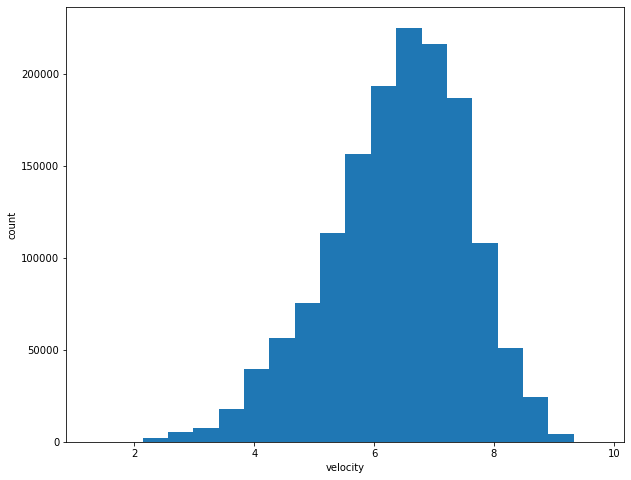

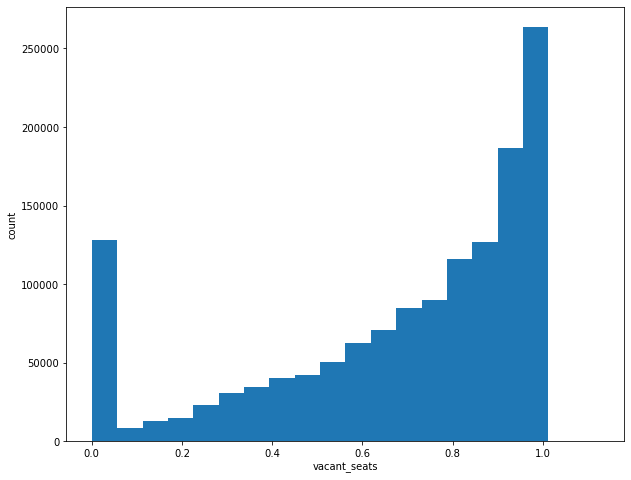

In [261]:
# scr.graph_eda('hist', df['total_taxi'])
scr.graph_eda('hist', df['velocity'])
# scr.graph_eda('hist', df['depart_ratio'])
scr.graph_eda('hist', df['vacant_seats'])

# PIPELINES

## Split Data

In [262]:
x = df_final.drop(columns=['arr_delay', 'fl_date'])
y = df_final['arr_delay']

# split at default percent
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

## Numeric and Categorical Features

In [263]:
# define numerical transformations
num_features = xtrain.select_dtypes(include='number').columns.to_list()
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# define categorical transformations
cat_features = xtrain.select_dtypes(include='object').columns.to_list()
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# parallel transformations
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

## Models

In [264]:
rd = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', Ridge())
])

ls = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', Lasso())
])

lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBRegressor())
])

In [265]:
rd.fit(X=xtrain, y=ytrain)
ypred_rd = rd.predict(xtest)

ls.fit(X=xtrain, y=ytrain)
ypred_ls = ls.predict(xtest)

lr.fit(X=xtrain, y=ytrain)
ypred_lr = lr.predict(xtest)

xgb.fit(X=xtrain, y=ytrain)
ypred_xgb = xgb.predict(xtest)

In [266]:
# ridge regression
print(f'Ridge RMSE: {np.sqrt(mean_squared_error(ytest, ypred_rd))}')
print(f'Ridge MAE: {mean_absolute_error(ytest, ypred_rd)})')
print(f'Ridge R2: {r2_score(ytest, ypred_rd)}')
print('---')
# lasso regression
print(f'Lasso RMSE: {np.sqrt(mean_squared_error(ytest, ypred_ls))}')
print(f'Lasso MAE: {mean_absolute_error(ytest, ypred_ls)})')
print(f'Lasso R2: {r2_score(ytest, ypred_ls)}')
print('---')
# linear regression
print(f'LR RMSE: {np.sqrt(mean_squared_error(ytest, ypred_lr))}')
print(f'LR MAE: {mean_absolute_error(ytest, ypred_lr)})')
print(f'LR R2: {r2_score(ytest, ypred_lr)}')
print('---')
# xgboost
print(f'XG RMSE: {np.sqrt(mean_squared_error(ytest, ypred_xgb))}')
print(f'XG MAE: {mean_absolute_error(ytest, ypred_xgb)})')
print(f'xG R2: {r2_score(ytest, ypred_xgb)}')

Ridge RMSE: 54.73352813511151
Ridge MAE: 28.517291677671732)
Ridge R2: 0.001834747147559046
---
Lasso RMSE: 54.783860239600855
Lasso MAE: 28.536835600101043)
Lasso R2: -1.8915405803898722e-06
---
LR RMSE: 54.73354408727134
LR MAE: 28.513989044190854)
LR R2: 0.00183416531428382
---
XG RMSE: 54.00906790950371
XG MAE: 28.11954575306558)
xG R2: 0.02808356829093217


# 

## Grid Search CV

In [267]:
parameter_candidates = {
    'objective' : ['reg:squarederror'],
    'colsample_bytree' : [0.6],
    'learning_rate' : [0.2, 0.3, 0.4],
        'max_depth' : [3, 4],
        'lambda' : [0.1, 1],
        'alpha' : [0.1, 1],
        'n_estimators' : [3, 4]
}

cv_parameters = {
    'nfold' : 5,
    'num_boost_round' : 6,
    'early_stopping_rounds' : 10
}

In [268]:
# y_pred, cv_results = scr.xgboost_det(
#     df=df_flights_pass_weather,
#     target='arr_delay',
#     params=parameter_candidates,
#     cv_params=cv_parameters,
#     gridsearch=True,
#     scaler='minmax',
#     )

##### Best parameters:
```python
{'alpha': 0,
'colsample_bytree': 0.6,
'lambda': 0,
'learning_rate': 0.1,
'max_depth': 3,
'n_estimators': 6,
'objective': 'reg:squarederror'}
```

# PREDICTIONS

In [269]:
table_name = 'passengers'
limit = 100000
filename = f'{table_name}_{str(limit/1000)}k_sample.csv'
df_passengers = pd.read_csv(Path('./data') / filename)

In [270]:
print(df_passengers.columns.tolist())
print(df_passengers.shape)

['departures_scheduled', 'departures_performed', 'payload', 'seats', 'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time', 'unique_carrier', 'airline_id', 'unique_carrier_name', 'region', 'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new', 'origin_airport_id', 'origin_city_market_id', 'origin', 'origin_city_name', 'origin_country', 'origin_country_name', 'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name', 'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type', 'aircraft_config', 'year', 'month', 'distance_group', 'class', 'data_source']
(100000, 38)


In [271]:
np.intersect1d(df_flights_test.columns, df_passengers.columns)

array(['dest', 'dest_airport_id', 'dest_city_name', 'distance', 'origin',
       'origin_airport_id', 'origin_city_name'], dtype=object)

## Merge Tables

### Weather

In [272]:
df_weather_test = pd.read_csv('./data/weather_test.csv')

In [273]:
df_weather_test

,Unnamed: 0,location,date,time,tempC,condition
0,0,"Baltimore, MD",2020-01-01,0,5,116
1,1,"Baltimore, MD",2020-01-01,300,4,116
2,2,"Baltimore, MD",2020-01-01,600,3,116
3,3,"Baltimore, MD",2020-01-01,900,3,116
4,4,"Baltimore, MD",2020-01-01,1200,5,113
...,...,...,...,...,...,...
90763,90763,"Rota, TT",2020-01-31,900,2,119
90764,90764,"Rota, TT",2020-01-31,1200,5,119
90765,90765,"Rota, TT",2020-01-31,1500,7,119
90766,90766,"Rota, TT",2020-01-31,1800,6,122


In [274]:
# Categorize weather conditions be code:
#   rain or like weather = > 263
#   sunny = 113
#   cloudy = 116, 119, 122
#   snow = 227, 230

df_wconditions = pd.read_csv(Path('./data') / 'weather_conditions.csv', usecols=[0,1,2], sep=',')
df_wconditions.drop_duplicates(inplace=True)
df_wconditions.sort_values(by='overhead_code', inplace=True)

In [275]:
daytime = []
df_weather_copy = df_weather_test.copy()

# add 6 hours to make it easier to separate into day/night
df_weather_copy['time'] = [time+600 for time in df_weather_test['time'].astype(int)]
df_weather_copy['tempC'] = [temp for temp in df_weather_test['tempC'].astype(int)]
df_weather_copy['condition'] = [con for con in df_weather_test['condition'].astype(int)]

# encode time into day/night
for i,time in df_weather_copy['time'].iteritems():
    # code the time to 24 hours
    if time >= 2400:
        df_weather_copy.loc[i, 'time'] = time - 2400
    # convert 
    if df_weather_copy.loc[i, 'time'] >= 1200:
        daytime.append(0) # day
    else:
        daytime.append(1) # night

In [276]:
# consolidate around location, date, and time using the condition mean to determine the average condition throughout
# the day
df_weather_test = df_weather_copy.join(pd.Series(daytime, name='night'))
df_weather_test = df_weather_test.drop(['time'], axis=1).groupby(['location', 'date', 'night'])['condition'].aggregate('median').reset_index()

In [277]:
# define conditions per row then join to weather dataframe
conditions = []

for condition in df_weather_test['condition']:
    if condition > 250:
        conditions.append('rain')
    elif condition > 200 and condition <= 250:
        conditions.append('snow')
    elif condition < 115:
        conditions.append('sunny')
    else:
        conditions.append('cloudy')

df_weather_test = df_weather_test.join(pd.Series(conditions, name='cond_desc'))

### New Data

In [278]:
df_flights_pass = pd.merge(
    df_flights_test,
    df_passengers,
    on=['dest', 'dest_airport_id', 'dest_city_name', 'distance', 'origin','origin_airport_id', 'origin_city_name'],
    how='inner')

In [279]:
df_flights_pass.shape

(4776377, 51)

In [280]:
df_flights_pass_weather = pd.merge(
    df_flights_pass,
    df_weather_test,
    left_on=['fl_date', 'origin_city_name'],
    right_on=['date', 'location'],
    how='inner'
    )

In [281]:
raw = df_flights_pass_weather.isnull().sum().to_dict()

In [282]:
df_flights_pass_weather.shape

(9552692, 56)

## CLEANING

### Drop Null Values and Columns

In [283]:
list(raw.keys())

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'crs_arr_time',
 'dup',
 'crs_elapsed_time',
 'flights',
 'distance',
 'departures_scheduled',
 'departures_performed',
 'payload',
 'seats',
 'passengers',
 'freight',
 'mail',
 'ramp_to_ramp',
 'air_time',
 'unique_carrier',
 'airline_id',
 'unique_carrier_name',
 'region',
 'carrier',
 'carrier_name',
 'carrier_group',
 'carrier_group_new',
 'origin_city_market_id',
 'origin_country',
 'origin_country_name',
 'dest_city_market_id',
 'dest_country',
 'dest_country_name',
 'aircraft_group',
 'aircraft_type',
 'aircraft_config',
 'year',
 'month',
 'distance_group',
 'class',
 'data_source',
 'location',
 'date',
 'night',
 'condition',
 'cond_desc']

In [284]:
np.intersect1d(list(raw.keys()), [                                
    'cancellation_code',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay',
    'first_dep_time',
    'total_add_gtime',
    'longest_add_gtime',
    'no_name',
    'data_source',
])

array(['data_source'], dtype='<U21')

In [285]:
# drop delay times and empty columns
df_drop_colna = df_flights_pass_weather.drop(columns=[
    'data_source',
])

In [286]:
# drop remaining null values
df_drop_rows = df_drop_colna.dropna()
df_drop_dupes = df_drop_rows.drop_duplicates()

In [287]:
# drop irrelevant or uninformative columns
df_drop_cols = df_drop_dupes.drop(columns=[
    'mkt_unique_carrier',
    'branded_code_share',
    # 'mkt_carrier',
    # 'mkt_carrier_fl_num',
    'op_unique_carrier',
    'tail_num',
    # 'origin',
    # 'dest',
    'flights',
    'op_carrier_fl_num',
    'origin_airport_id',
    'origin_city_name',
    'dest_airport_id',
    'dest_city_name',
    'crs_dep_time',
    'crs_arr_time',
    'dup',
    'crs_elapsed_time',
    'ramp_to_ramp',
    'unique_carrier',
    'unique_carrier_name',
    'airline_id',
    'carrier',
    'carrier_name',
    'carrier_group_new',
    'origin_city_market_id',
    'origin_country_name',
    'dest_city_market_id',
    'dest_country_name',
    'aircraft_group',
    'aircraft_type',
    'distance_group',
    'origin_country',
    'dest_country',
    'mail',
    'freight',
    'year',
    'month',
    'location',
    'date',
    'condition'
])

## FEATURE ENGINEERING

In [288]:
df = df_drop_cols

In [289]:
# convert fl_date to datetime
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [290]:
# get seasons
seasons = []
for month in df['fl_date'].dt.month:
    if month < 4:
        seasons.append(0)
    elif month < 7:
        seasons.append(1)
    elif month < 10:
        seasons.append(2)
    else:
        seasons.append(3)

df['season'] = seasons

# weekends
weekends = []
for day in df['fl_date'].dt.dayofweek:
    if day==6 or day==7:
        weekends.append(1)
    else:
        weekends.append(0)
        
df['weekend'] = weekends

# total taxi
# df['total_taxi'] = df['taxi_out'] + df['taxi_in']

# velocity
df['velocity'] = df['distance'] / df['air_time']

# depart_ratio
# df['depart_ratio'] = df['departures_scheduled'] / df['departures_performed']

# vacant_seats
df['vacant_seats'] = df['passengers'] / df['seats']

# remove used columns
df_final = df.drop(columns=[
    # 'taxi_out',
    # 'taxi_in',
    'distance',
    'air_time',
    'departures_scheduled',
    'departures_performed',
    'passengers',
    'seats'
])

In [292]:
df_final.replace([np.inf, - np.inf], np.nan, inplace = True)
df_final = df_final.dropna()
# df_final = df_final.sort_values(by='fl_date').reset_index(drop=True)

In [293]:
# convert carrier_group, and aircraft_config to strings
df_final[['carrier_group', 'aircraft_config', 'season']] = df_final[['carrier_group', 'aircraft_config', 'season']].astype('str')

/var/folders/xm/yv4_9lnx4vxb435678j65d140000gn/T/ipykernel_80171/2472794188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[['carrier_group', 'aircraft_config', 'season']] = df_final[['carrier_group', 'aircraft_config', 'season']].astype('str')


## FIT TO WORKING MODEL & MAKE PREDICTIONS

In [294]:
(df_final == 0).sum()

fl_date                     0
mkt_carrier                 0
mkt_carrier_fl_num          0
origin                      0
dest                        0
payload                   758
region                      0
carrier_group               0
aircraft_config             0
class                       0
night                 3911572
cond_desc                   0
season                      0
weekend               6850204
velocity                    0
vacant_seats           515114
dtype: int64

In [295]:
df_final_less = df_final.sample(n=1000000)

In [296]:
print(df_flights_test.shape)
print(df_final_less.shape)

(660556, 20)
(1000000, 16)


In [311]:
df_flights_test['fl_date'] = pd.to_datetime(df_flights_test['fl_date'])
df = pd.merge(df_flights_test, df_final_less, how='inner').drop_duplicates()

In [312]:
ypred_xgb = xgb.predict(df)

In [313]:
df['predicted_delay'] = ypred_xgb

In [322]:
df_submission = df[[
    'fl_date',
    'mkt_carrier', 
    'mkt_carrier_fl_num',
    'origin',
    'dest',
    'predicted_delay']].drop_duplicates()

In [325]:
df_submission.to_csv('./data/flight_delay_predictions.csv', index=False)